In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
new_pieman = niidb.FMriActivationsDb('data/new_pieman.db',
                                     mask='/home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz')

In [5]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(list(new_pieman.all()), mask='/home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz', num_factors=100)

01/14/2019 18:19:25 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-19-task-intact2.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
01/14/2019 18:19:29 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-70-task-rest1.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
01/14/2019 18:19:32 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-72-task-rest1.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
01/14/2019 18:19:38 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-39-task-word.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
01/14/2019 18:19:41 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-45-task-word.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
01/14

In [6]:
htfa.load_state('data/pieman_k100_n1000_01122019_183624')

In [7]:
def task_labeler(b):
    if 'intact' in b.task:
        return 'Intact story'
    elif 'word' in b.task:
        return 'Word scrambled'
    elif b.task == 'paragraph':
        return 'Paragraph scrambled'
    elif 'rest' in b.task:
        return 'Resting state'

In [8]:
def subject_labeler(block):
    return 'Subject %d' % block.subject

In [9]:
def pieman_labeler(block):
    subject = subject_labeler(block)
    task = task_labeler(block)
    return subject + ', ' + task + ' stimulus'

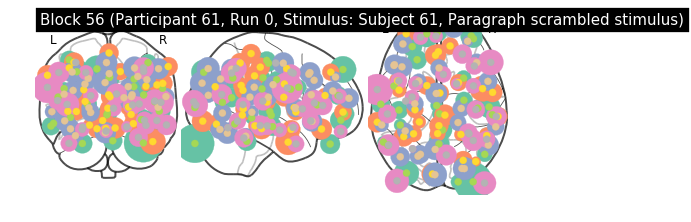

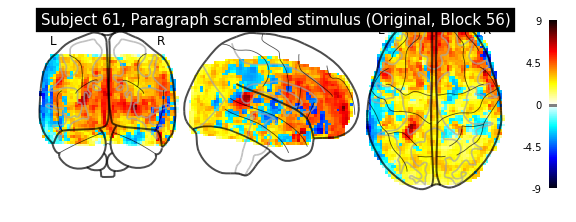

01/14/2019 18:29:43 Reconstruction Error (Frobenius Norm): 5.10931104e+03 out of 4.29069824e+03


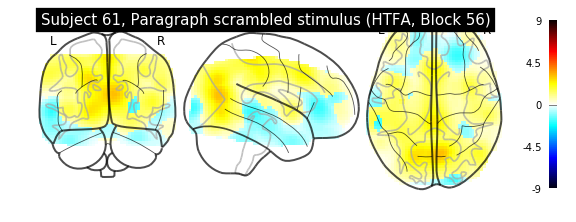

In [10]:
for b in np.random.choice(range(htfa.num_blocks), 5):
    htfa.plot_factor_centers(b, labeler=pieman_labeler)
    htfa.plot_original_brain(b, labeler=pieman_labeler)
    htfa.plot_reconstruction(b, labeler=pieman_labeler)

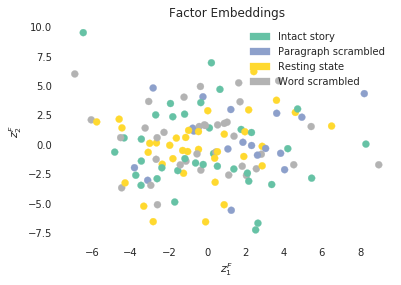

In [11]:
#factor 'embeddings' with PCA
htfa.scatter_factor_embedding(labeler=task_labeler,embedding='PCA')

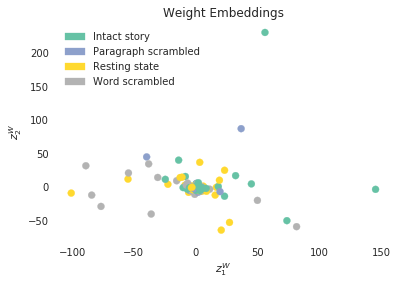

In [12]:
#weight 'embeddings' with PCA
htfa.scatter_weight_embedding(labeler=task_labeler,embedding='PCA')

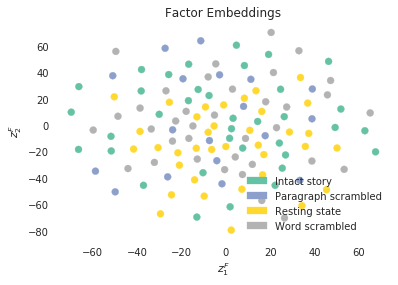

In [13]:
#factor 'embeddings' with TSNE
htfa.scatter_factor_embedding(labeler=task_labeler,embedding='TSNE')

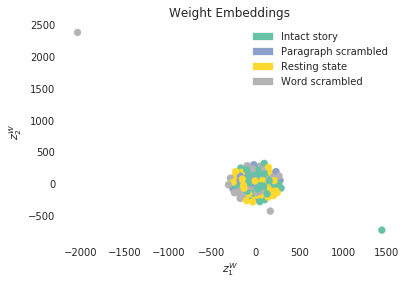

In [14]:
#weight 'embeddings' with TSNE
htfa.scatter_weight_embedding(labeler=task_labeler,embedding='TSNE')

In [15]:
htfa.decoding_accuracy()

intact1
intact2
paragraph
rest1
rest2
word


{'intact1': {'isfc': [array([0.00757576, 0.00505051, 0.        , 0.00757576, 0.00505051,
          0.00505051, 0.00252525, 0.00505051, 0.00252525])],
  'kl': [array([0.00757576, 0.01010101, 0.01010101, 0.01010101, 0.00757576,
          0.00757576, 0.00505051, 0.        , 0.        ])],
  'mixed': [array([0.01262626, 0.00252525, 0.01262626, 0.00757576, 0.00505051,
          0.00757576, 0.00505051, 0.00505051, 0.00757576])],
  'node': [array([0.00757576, 0.00505051, 0.01262626, 0.00505051, 0.00505051,
          0.00757576, 0.00252525, 0.00252525, 0.        ])]},
 'intact2': {'isfc': [array([0.00505051, 0.00505051, 0.00757576, 0.        , 0.00252525,
          0.        , 0.        , 0.00252525, 0.        ])],
  'kl': [array([0.00757576, 0.01010101, 0.00505051, 0.01010101, 0.00252525,
          0.01010101, 0.00252525, 0.01010101, 0.00505051])],
  'mixed': [array([0.01262626, 0.00757576, 0.01262626, 0.00252525, 0.00757576,
          0.00757576, 0.00505051, 0.00505051, 0.01262626])],
  'nod

In [16]:
htfa.voxel_decoding_accuracy()

intact1
intact2
paragraph
rest1
rest2
word


{'intact1': [array([0.06081081, 0.12837838, 0.02702703, 0.10810811, 0.03040541,
         0.05067568, 0.00675676, 0.02027027, 0.00337838])],
 'intact2': [array([0.13175676, 0.16216216, 0.10135135, 0.05067568, 0.03716216,
         0.02702703, 0.02364865, 0.01351351, 0.01351351])],
 'paragraph': [array([0.07432432, 0.13513514, 0.03378378, 0.09121622, 0.02364865,
         0.06081081, 0.00337838, 0.02364865, 0.00337838])],
 'rest1': [array([0.00505051, 0.01262626, 0.00757576, 0.01010101, 0.00252525,
         0.00252525, 0.01010101, 0.00505051, 0.00252525])],
 'rest2': [array([0.01010101, 0.00505051, 0.01010101, 0.00757576, 0.00757576,
         0.01010101, 0.00505051, 0.01010101, 0.00505051])],
 'word': [array([0.08783784, 0.0777027 , 0.06418919, 0.04391892, 0.02364865,
         0.02364865, 0.01013514, 0.01689189, 0.01351351])]}